In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')


In [47]:
df = pd.read_csv("dailyActivity_merged.csv")

In [48]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [49]:
df.Id.nunique()

33

In [50]:
cols = ['Id', 'ActivityDate', 'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
df = df[cols]
df

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863
...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,88,12,213,1127,3832


In [51]:
df.cols = ['Id'	,'ActivityDate'	,'TotalSteps'	,'TotalDistance'	,'LightlyActiveMinutes'	,'VeryActiveMinutes'	,'FairlyActiveMinutes'	,'SedentaryMinutes'	,'Calories']


In [52]:
df["TotalMinutes"] = df.FairlyActiveMinutes + df.VeryActiveMinutes + df.SedentaryMinutes + df.LightlyActiveMinutes
df

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040
...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,17,4,245,1174,2847,1440
936,8877689391,5/9/2016,20226,73,19,217,1131,3710,1440
937,8877689391,5/10/2016,10733,18,11,224,1187,2832,1440
938,8877689391,5/11/2016,21420,88,12,213,1127,3832,1440


In [53]:
df["TotalHours"] = round(df.TotalMinutes / 60)
df

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094,18.0
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033,17.0
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998,17.0
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040,17.0
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,17,4,245,1174,2847,1440,24.0
936,8877689391,5/9/2016,20226,73,19,217,1131,3710,1440,24.0
937,8877689391,5/10/2016,10733,18,11,224,1187,2832,1440,24.0
938,8877689391,5/11/2016,21420,88,12,213,1127,3832,1440,24.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    940 non-null    int64  
 1   ActivityDate          940 non-null    object 
 2   TotalSteps            940 non-null    int64  
 3   VeryActiveMinutes     940 non-null    int64  
 4   FairlyActiveMinutes   940 non-null    int64  
 5   LightlyActiveMinutes  940 non-null    int64  
 6   SedentaryMinutes      940 non-null    int64  
 7   Calories              940 non-null    int64  
 8   TotalMinutes          940 non-null    int64  
 9   TotalHours            940 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 73.6+ KB


In [55]:
df.ActivityDate = pd.to_datetime(df.ActivityDate)
df


,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,17,4,245,1174,2847,1440,24.0
936,8877689391,2016-05-09,20226,73,19,217,1131,3710,1440,24.0
937,8877689391,2016-05-10,10733,18,11,224,1187,2832,1440,24.0
938,8877689391,2016-05-11,21420,88,12,213,1127,3832,1440,24.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    940 non-null    int64         
 1   ActivityDate          940 non-null    datetime64[ns]
 2   TotalSteps            940 non-null    int64         
 3   VeryActiveMinutes     940 non-null    int64         
 4   FairlyActiveMinutes   940 non-null    int64         
 5   LightlyActiveMinutes  940 non-null    int64         
 6   SedentaryMinutes      940 non-null    int64         
 7   Calories              940 non-null    int64         
 8   TotalMinutes          940 non-null    int64         
 9   TotalHours            940 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 73.6 KB


In [57]:
import datetime as dt

In [58]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['TotalSteps'], **{})
chart

In [59]:
df['DayofWeek'] = df.ActivityDate.dt.day_name()
df

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,DayofWeek
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,17,4,245,1174,2847,1440,24.0,Sunday
936,8877689391,2016-05-09,20226,73,19,217,1131,3710,1440,24.0,Monday
937,8877689391,2016-05-10,10733,18,11,224,1187,2832,1440,24.0,Tuesday
938,8877689391,2016-05-11,21420,88,12,213,1127,3832,1440,24.0,Wednesday


In [60]:
df.isnull().sum()

Id                      0
ActivityDate            0
TotalSteps              0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
TotalMinutes            0
TotalHours              0
DayofWeek               0
dtype: int64

In [61]:
df.describe()
# df.describe(include = "all") to describe String


,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283


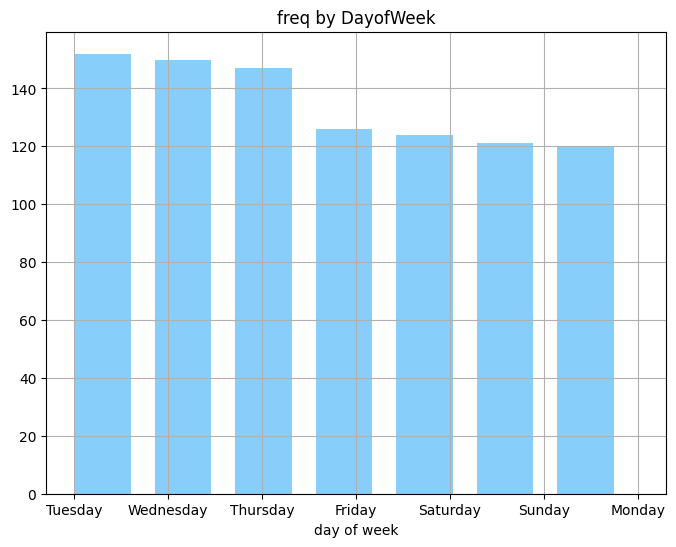

In [62]:
plt.figure(figsize = (8,6))
plt.hist(df.DayofWeek, bins = 7, color = "lightskyblue", width = 0.6)
plt.grid(True)
plt.xlabel('day of week')
plt.title("freq by DayofWeek")
plt.show()

In [63]:
df

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,DayofWeek
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,17,4,245,1174,2847,1440,24.0,Sunday
936,8877689391,2016-05-09,20226,73,19,217,1131,3710,1440,24.0,Monday
937,8877689391,2016-05-10,10733,18,11,224,1187,2832,1440,24.0,Tuesday
938,8877689391,2016-05-11,21420,88,12,213,1127,3832,1440,24.0,Wednesday


In [64]:
df.corr

<bound method DataFrame.corr of              Id ActivityDate  TotalSteps  VeryActiveMinutes  \
0    1503960366   2016-04-12       13162                 25   
1    1503960366   2016-04-13       10735                 21   
2    1503960366   2016-04-14       10460                 30   
3    1503960366   2016-04-15        9762                 29   
4    1503960366   2016-04-16       12669                 36   
..          ...          ...         ...                ...   
935  8877689391   2016-05-08       10686                 17   
936  8877689391   2016-05-09       20226                 73   
937  8877689391   2016-05-10       10733                 18   
938  8877689391   2016-05-11       21420                 88   
939  8877689391   2016-05-12        8064                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                     13                   328               728      1985   
1                     19                   217               776      1797   
2                     11                   181              1218      1776   
3                     34                   209               726      1745   
4                     10                   221               773      1863   
..                   ...                   ...               ...       ...   
935                    4                   245              1174      2847   
936                   19                   217              1131      3710   
937                   11                   224              1187      2832   
938                   12                   213              1127      3832   
939                    1                   137               770      1849   

     TotalMinutes  TotalHours  DayofWeek  
0            1094        18.0    Tuesday  
1            1033        17.0  Wednesday  
2            1440        24.0   Thursday  
3             998        17.0     Friday  
4            1040        17.0   Saturday  
..            ...         ...        ...  
935          1440        24.0     Sunday  
936          1440        24.0     Monday  
937          1440        24.0    Tuesday  
938          1440        24.0  Wednesday  
939           931        16.0   Thursday  

[940 rows x 11 columns]>

In [65]:
# sns.heatmap(df.corr())

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'DayofWeek' to numerical representation (e.g., Monday=0, Tuesday=1, etc.)
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['DayofWeek'] = df['DayofWeek'].map(day_mapping)  # Replace 'DayofWeek' with the actual column name

# Calculate correlation matrix

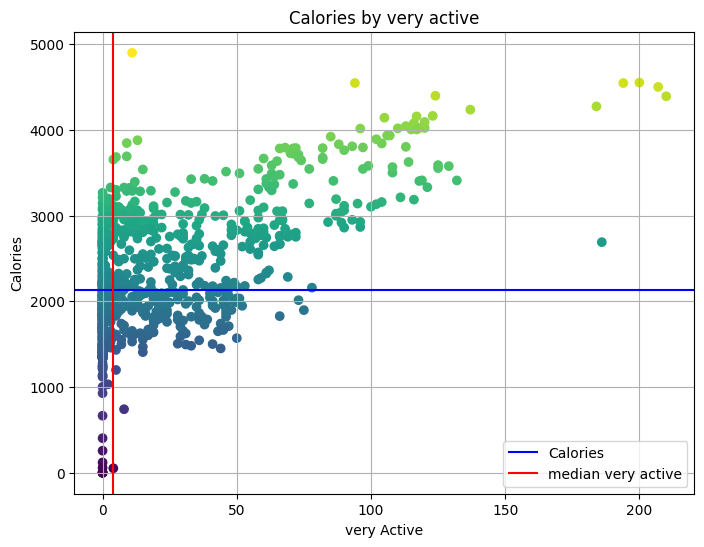

In [67]:
plt.figure(figsize = (8,6))
plt.scatter(df.VeryActiveMinutes, df.Calories, c = df.Calories)
median_active = 4.000000
median_calories = 2134.000000

plt.axhline(median_calories, color = "blue", label = "Calories")
plt.axvline(median_active, color = "red", label = "median very active")

plt.grid(True)
plt.xlabel('very Active')
plt.ylabel('Calories')
plt.title("Calories by very active")
plt.legend()
plt.show()

In [68]:
df.describe()

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,DayofWeek
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830,2.918085
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000,1.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000,3.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000,5.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000,6.000000
std,2.424805e+09,NaN,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283,1.942379


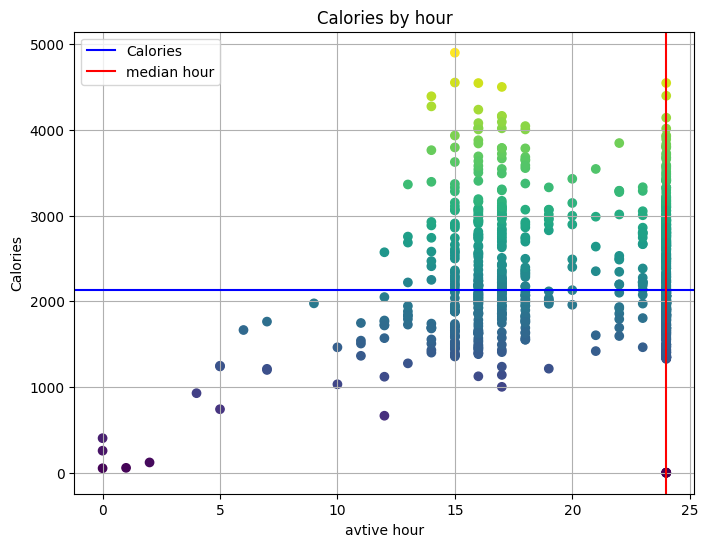

In [69]:
plt.figure(figsize = (8,6))
plt.scatter(df.TotalHours, df.Calories, c = df.Calories)
median_hour= 24.000000
median_calories = 2134.000000

plt.axhline(median_calories, color = "blue", label = "Calories")
plt.axvline(median_hour, color = "red", label = "median hour")

plt.grid(True)
plt.xlabel('avtive hour')
plt.ylabel('Calories')
plt.title("Calories by hour")
plt.legend()
plt.show()

In [70]:
# VeryActiveMinutes = df.VeryActiveMinutes.sum()
# FairlyActiveMinutes = df.FairlyActiveMinutes.sum()
# LightlyActiveMinutes = df.LightlyActiveMinutes.sum()
# SedentaryMinutes = df.SedentaryMinutes.sum()

# minutes = [VeryActiveMinutes,	FairlyActiveMinutes,	LightlyActiveMinutes,	sendentaryMinutes]

# labels = ['VeryActiveMinutes',	'FairlyActiveMinutes',	'LightlyActiveMinutes',	'sendentaryMinutes']

# plt.pie(minutes, labels=labels, autopct='%1.1f%%', explode = [0,0,0,0.1])

([<matplotlib.patches.Wedge at 0x7e9cb6e8fd60>,
 [Text(1.0983633515717721, 0.059982896929240755, 'VeryActiveMinutes'),
  Text(1.0886022147551395, 0.1579405522030527, 'FairlyActiveMinutes'),
  Text(0.8580470838875357, 0.6882987736674362, 'LightlyActiveMinutes'),
  Text(-0.9994337278611289, -0.6641778554074256, 'SedentaryMinutes')],
 [Text(0.5991072826755119, 0.03271794377958586, '1.7%'),
  Text(0.5937830262300761, 0.086149392110756, '1.1%'),
  Text(0.4680256821204739, 0.3754356947276924, '15.8%'),
  Text(-0.5830030079189918, -0.3874370823209982, '81.3%')])

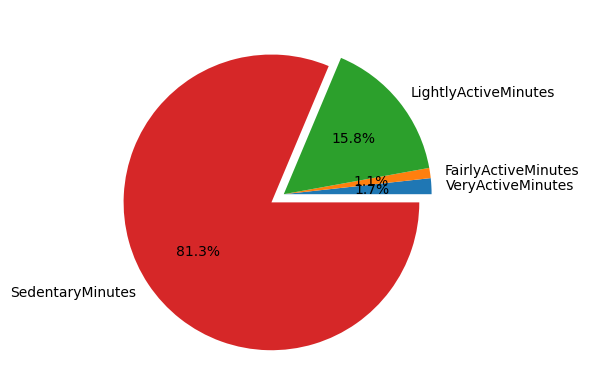

In [71]:
VeryActiveMinutes = df.VeryActiveMinutes.sum()
FairlyActiveMinutes = df.FairlyActiveMinutes.sum()
LightlyActiveMinutes = df.LightlyActiveMinutes.sum()
SedentaryMinutes = df.SedentaryMinutes.sum()

# Use the correct variable name 'SedentaryMinutes'
minutes = [VeryActiveMinutes,	FairlyActiveMinutes,	LightlyActiveMinutes,	SedentaryMinutes]

labels = ['VeryActiveMinutes',	'FairlyActiveMinutes',	'LightlyActiveMinutes',	'SedentaryMinutes']

plt.pie(minutes, labels=labels, autopct='%1.1f%%', explode = [0,0,0,0.1])